In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dataExploration').getOrCreate()

In [2]:
data = spark.read.csv("Datasets/Filled Jobs by Industry (ANZSIC06) by Sex and Status in Employment (Qrtly-MarJunSepDec).csv",inferSchema=True,header=True)

In [3]:
data.show()

+-----------+-------------------+------+-----------------------------+----------------------------------+----------------------------------+------------------------------------+
|YearQuarter|           Industry|Gender|Number of Working Proprietors|Number of Part-Time Paid Employees|Number of Full-Time Paid Employees|Total Number of People in Employment|
+-----------+-------------------+------+-----------------------------+----------------------------------+----------------------------------+------------------------------------+
|     1989Q1|Forestry and Mining|  Male|                          800|                               800|                              9000|                               10700|
|     1989Q2|Forestry and Mining|  Male|                          800|                               900|                              8100|                                9800|
|     1989Q3|Forestry and Mining|  Male|                          800|                               800|     

In [4]:
results = data.filter("Industry = 'All Industries'").select('YearQuarter','Gender','Total Number of People in Employment')
resultsM = results.filter("Gender = 'Male'").select('YearQuarter','Total Number of People in Employment')
resultsM.show()
resultsF = results.filter("Gender = 'Female'").select('YearQuarter','Total Number of People in Employment')
resultsF.show()

+-----------+------------------------------------+
|YearQuarter|Total Number of People in Employment|
+-----------+------------------------------------+
|     1989Q1|                              670400|
|     1989Q2|                              662800|
|     1989Q3|                              648300|
|     1989Q4|                              635800|
|     1990Q1|                              644200|
|     1990Q2|                              634700|
|     1990Q3|                              632200|
|     1990Q4|                              632700|
|     1991Q1|                              644300|
|     1991Q2|                              629900|
|     1991Q3|                              606600|
|     1991Q4|                              607600|
|     1992Q1|                              620900|
|     1992Q2|                              617100|
|     1992Q3|                              601900|
|     1992Q4|                              612600|
|     1993Q1|                  

In [5]:
resultsX = data.filter("Industry = 'Arts, Recreation and Other Services'").select('YearQuarter','Gender','Total Number of People in Employment')
resultsXM = resultsX.filter("Gender = 'Male'").select('YearQuarter','Total Number of People in Employment')
resultsXM.show()
resultsXF = resultsX.filter("Gender = 'Female'").select('YearQuarter','Total Number of People in Employment')
resultsXF.show()

+-----------+------------------------------------+
|YearQuarter|Total Number of People in Employment|
+-----------+------------------------------------+
|     1989Q1|                               35300|
|     1989Q2|                               36000|
|     1989Q3|                               36000|
|     1989Q4|                               35500|
|     1990Q1|                               35600|
|     1990Q2|                               35300|
|     1990Q3|                               35100|
|     1990Q4|                               34800|
|     1991Q1|                               35300|
|     1991Q2|                               35100|
|     1991Q3|                               34700|
|     1991Q4|                               34500|
|     1992Q1|                               34300|
|     1992Q2|                               34300|
|     1992Q3|                               34400|
|     1992Q4|                               34600|
|     1993Q1|                  

In [6]:
resultsY = data.filter("Industry = 'Financial and Insurance Services'").select('YearQuarter','Gender','Total Number of People in Employment')
resultsYM = resultsY.filter("Gender = 'Male'").select('YearQuarter','Total Number of People in Employment')
resultsYM.show()
resultsYF = resultsY.filter("Gender = 'Female'").select('YearQuarter','Total Number of People in Employment')
resultsYF.show()

+-----------+------------------------------------+
|YearQuarter|Total Number of People in Employment|
+-----------+------------------------------------+
|     1989Q1|                               21300|
|     1989Q2|                               20100|
|     1989Q3|                               19900|
|     1989Q4|                               20200|
|     1990Q1|                               20400|
|     1990Q2|                               19500|
|     1990Q3|                               19900|
|     1990Q4|                               19800|
|     1991Q1|                               19400|
|     1991Q2|                               18500|
|     1991Q3|                               18600|
|     1991Q4|                               18500|
|     1992Q1|                               19400|
|     1992Q2|                               18900|
|     1992Q3|                               18500|
|     1992Q4|                               17800|
|     1993Q1|                  

In [7]:
results1 = resultsM.toPandas()
results2 = resultsF.toPandas()

In [8]:
results3 = resultsXM.toPandas()
results4 = resultsXF.toPandas()

In [9]:
results5 = resultsYM.toPandas()
results6 = resultsYF.toPandas()

In [10]:
import matplotlib.pyplot as plt

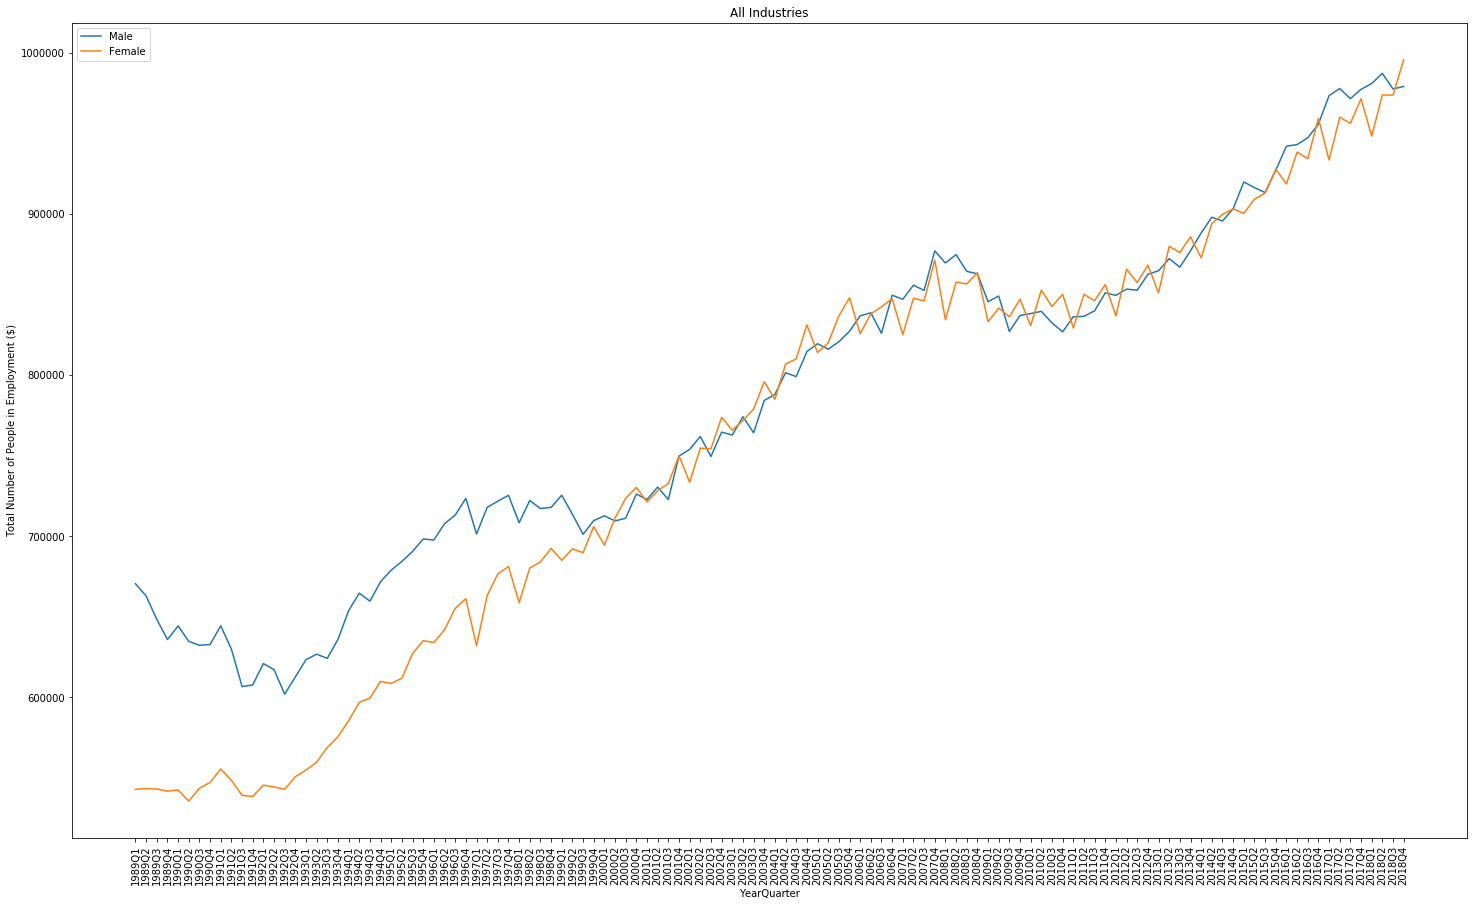

In [16]:
names = results1['YearQuarter']
values1 = results1['Total Number of People in Employment']
values2 = results2['Total Number of People in Employment']

fig, ax = plt.subplots()
ax.plot(names, values1, label="Male")
ax.plot(names, values2, label="Female")
ax.legend()

ax.set_xlabel('YearQuarter')
ax.set_ylabel('Total Number of People in Employment ($)')
ax.set_title('All Industries')

plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (25,15)

plt.show()

In [12]:
import matplotlib.pyplot as plt2

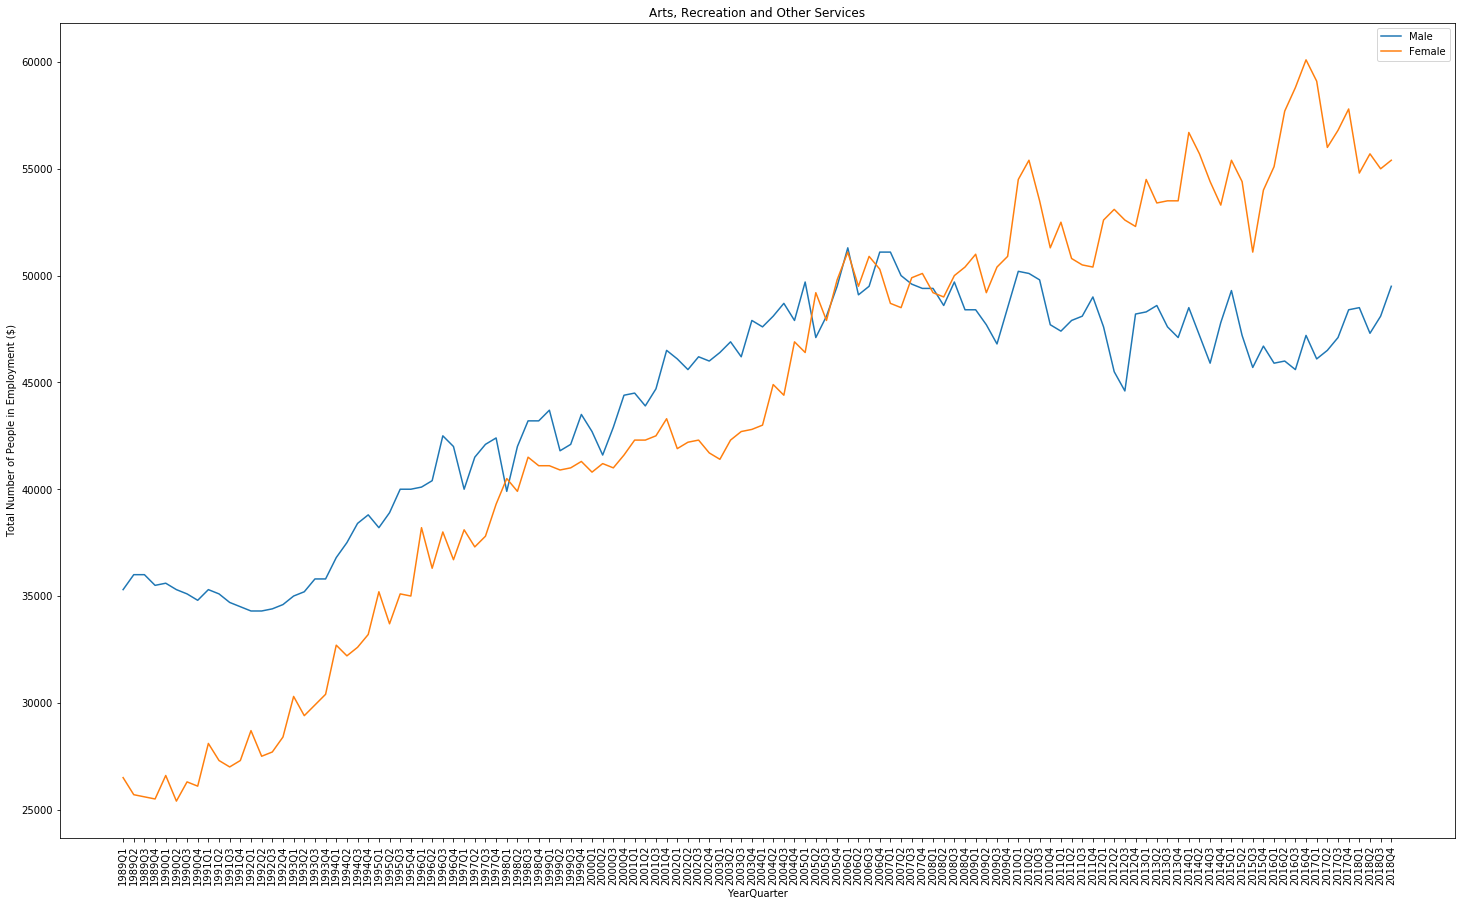

In [13]:
names2 = results3['YearQuarter']
values3 = results3['Total Number of People in Employment']
values4 = results4['Total Number of People in Employment']

fig1, ax1 = plt2.subplots()
ax1.plot(names2, values3, label="Male")
ax1.plot(names2, values4, label="Female")
ax1.legend()

ax1.set_xlabel('YearQuarter')
ax1.set_ylabel('Total Number of People in Employment ($)')
ax1.set_title('Arts, Recreation and Other Services')

plt2.xticks(rotation=90)

plt2.rcParams["figure.figsize"] = (25,15)

plt2.show()

In [14]:
import matplotlib.pyplot as plt3

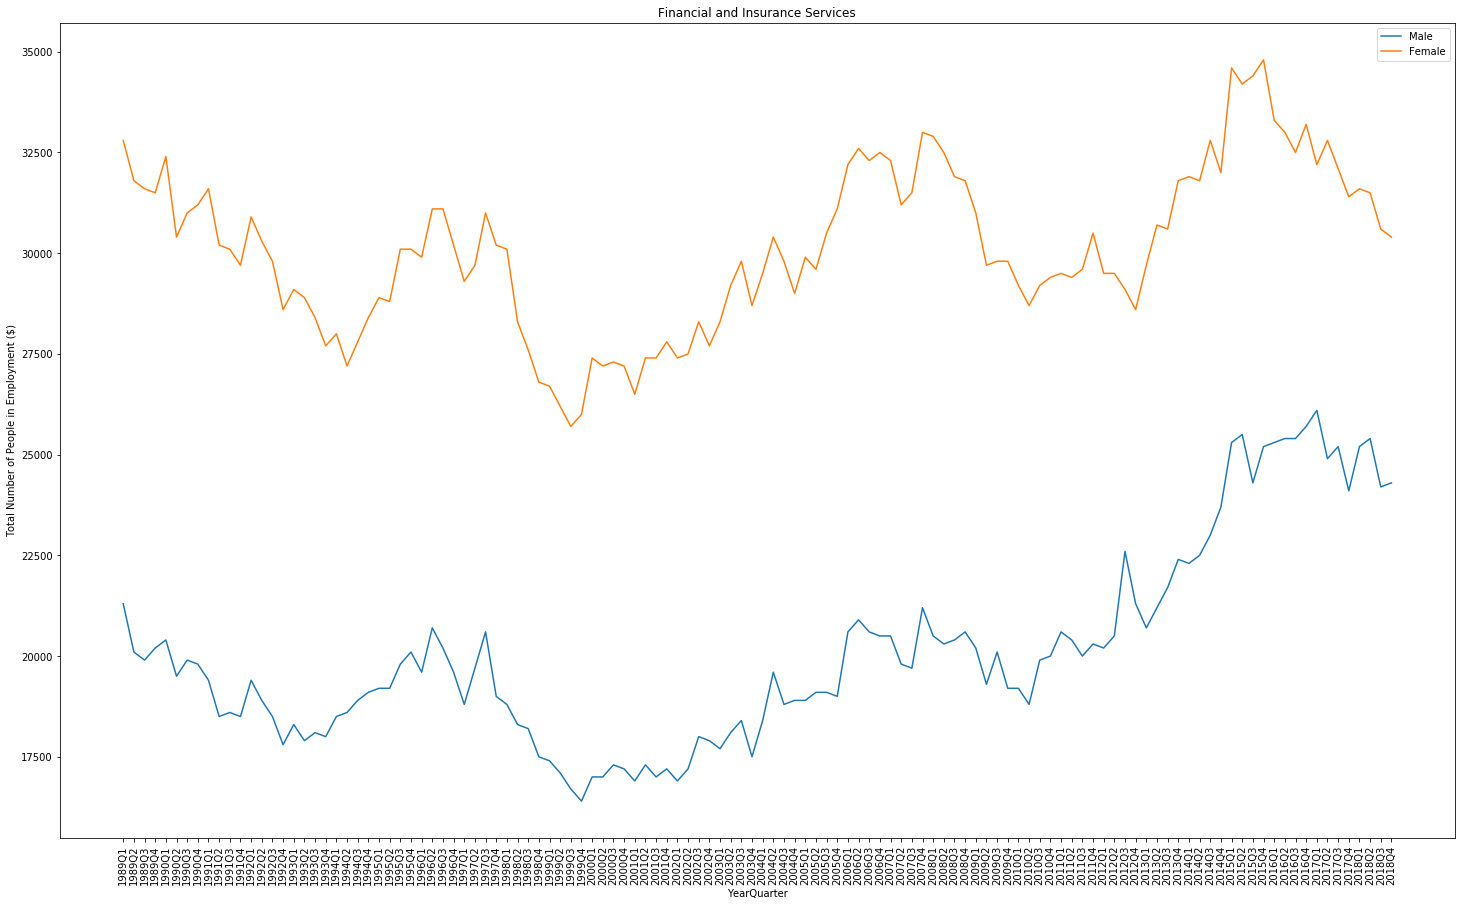

In [15]:
names3 = results5['YearQuarter']
values5 = results5['Total Number of People in Employment']
values6 = results6['Total Number of People in Employment']

fig2, ax2 = plt.subplots()
ax2.plot(names3, values5, label="Male")
ax2.plot(names3, values6, label="Female")
ax2.legend()

ax2.set_xlabel('YearQuarter')
ax2.set_ylabel('Total Number of People in Employment ($)')
ax2.set_title('Financial and Insurance Services')

plt3.xticks(rotation=90)

plt3.rcParams["figure.figsize"] = (25,15)

plt3.show()